# we can run this on Colab!

In [58]:
# uncomment this if you haven't install ploty
# pip install ploty

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly
import datetime
import seaborn as sns

In [3]:
vacancies = pd.read_csv('qualified_vacany_pure_filled.csv')

In [4]:
vacancies.drop("Unnamed: 0",axis=1,inplace=True)

# 1. See if holiday will impact the vacanies

In [5]:
holidays = pd.read_csv('holiday.csv')

In [6]:
holiday_ls = holidays["0"].to_list()

In [8]:
def holidayMap(x):
    if x[0:10] in holiday_ls:
        return 1
    return 0

In [9]:
vacancies["holiday"] = vacancies["time"].apply(holidayMap)

In [12]:
vacancies['holiday'][vacancies['day_of_week'] == 5] = 1

<ipython-input-12-ab1ab7e218da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacancies['holiday'][vacancies['day_of_week'] == 5] = 1


In [13]:
vacancies['holiday'][vacancies['day_of_week'] == 6] = 1

<ipython-input-13-be558520c059>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacancies['holiday'][vacancies['day_of_week'] == 6] = 1


In [14]:
vacancies_mean_holiday = vacancies.groupby("holiday").mean()

In [15]:
vacancies_mean_holiday = vacancies_mean_holiday.T

### The answer is NO

As the mean of vacanies on holiday is almost the same as the mean of vacanies on weekdays

In [16]:
vacancies_mean_holiday[0].mean()

45.13994049477682

In [17]:
vacancies_mean_holiday[1].mean()

46.186927758624094

## Below is the graph of mean of vacanies of each car park on holidays and weekdays

In [57]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(name='weekdays', x=vacancies_mean_holiday.index[:50], y=vacancies_mean_holiday[0]))
fig.add_trace(go.Bar(name ='Holiday', x=vacancies_mean_holiday.index[:50], y=vacancies_mean_holiday[1]))
fig.show()

# 2. mean of vacanies overall

In [20]:
means = vacancies.mean()
means = means.to_frame()

In [21]:
means.drop(['day_of_week', 'minute', 'hour', 'holiday'], axis=0, inplace=True)
means.rename(columns={0:'mean'}, inplace=True)
means.sort_values(by='mean', inplace=True)

In [54]:
fig = go.Figure() 

fig.add_trace(go.Bar(x = means.index, y=means['mean']))

fig.show()

## The overall mean is not high nor low.

In [24]:
means.mean()

mean    46.547276
dtype: float64

In [111]:
means.describe()

,mean
count,94.000000
mean,46.547276
std,60.499342
min,0.000000
25%,11.449960
50%,24.782385
75%,64.382511
max,358.448911


## The mean vacanies of car parks are skewed to the left

Text(0.5, 1.0, 'Mean of vacanies of car parks')

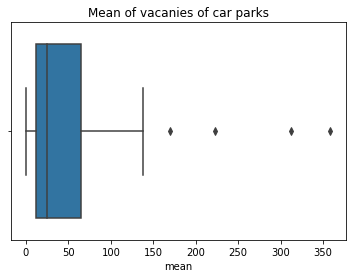

In [52]:
ax = sns.boxplot(x=means['mean'])
plt.title('Mean of vacanies of car parks')

# 3. Find the distribution of vacanies across district

In [26]:
districts = pd.read_csv('car_park_info.csv')

districts.set_index('park_id', inplace=True)

In [27]:
district_ls = []

for ind in means.index:
    district_ls.append(districts.loc[ind]['district_en'])

In [29]:
means['district'] = district_ls

In [30]:
districts_means = means.groupby('district').mean()

## Below is a sorted mean vacanies across district

In [31]:
districts_means.sort_values(by='mean')

,mean
district,
Kwun Tong,5.417258
Kowloon City,9.062081
Yuen Long,10.045330
Eastern,13.725915
Sham Shui Po,16.187354
Wong Tai Sin,25.388535
Sha Tin,31.720719
Tuen Mun,35.033339
Sai Kung,41.052562


## Find the vacanies variation of different districts

In [33]:
district_hour_mean = vacancies.groupby('hour').mean().T

In [34]:
district_hour_mean.drop(['day_of_week', 'minute', 'holiday'], axis=0, inplace=True)

In [35]:
to_append = []

for col in district_hour_mean.T:
    to_append.append(districts.loc[col]['district_en'])
    
district_hour_mean['district'] = to_append

In [36]:
district_hour_mean = district_hour_mean.groupby('district').mean()

## Most districts become less available during 9:00-15:00

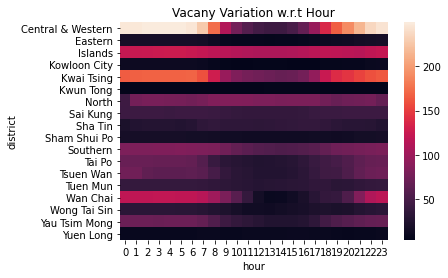

In [59]:
sns.heatmap(district_hour_mean)

plt.xticks(rotation=360)
plt.title('Vacany Variation w.r.t Hour')

plt.show()